<a href="https://colab.research.google.com/github/FerdinandPyCode/ArtificialIntelligence/blob/main/pipeline_translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip

--2023-11-26 21:05:39--  http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 173.194.203.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2638744 (2.5M) [application/zip]
Saving to: ‘spa-eng.zip’

spa-eng.zip         100%[===================>]   2.52M  --.-KB/s    in 0.01s   

2023-11-26 21:05:39 (237 MB/s) - ‘spa-eng.zip’ saved [2638744/2638744]



In [2]:
!unzip -nq spa-eng.zip

In [3]:
!ls

sample_data  spa-eng  spa-eng.zip


In [4]:
!ls spa-eng

_about.txt  spa.txt


In [5]:
!head spa-eng/spa.txt

Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!


In [7]:
# compile eng-spa translations
eng2spa = {}
for line in open('spa-eng/spa.txt'):
  line = line.rstrip()
  eng, spa = line.split('\t')
  if eng not in eng2spa:
    eng2spa[eng] = []
  eng2spa[eng].append(spa)

In [8]:
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

In [9]:
from nltk.translate.bleu_score import sentence_bleu , SmoothingFunction

In [10]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [11]:
tokenizer.tokenize('¿Qué me cuentas?'.lower())

['qué', 'me', 'cuentas']

In [12]:
tokens = tokenizer.tokenize('¿Qué me cuentas?'.lower())
sentence_bleu([tokens],tokens)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.2213386697554703e-77

In [13]:
sentence_bleu([['hi']],['hi'])

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

1.821831989445342e-231

In [15]:
smoother = SmoothingFunction()
sentence_bleu(['hi'],'hi', smoothing_function= smoother.method4)

0.2213885886251307

In [16]:
sentence_bleu(['hi there'.split()], 'hi there'.split())

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.491668146240062e-154

In [17]:
sentence_bleu(['hi there friend'.split()], 'hi there friend'.split())

1.2213386697554703e-77

In [19]:
sentence_bleu([[1,2,3,4]], [1,2,3,4])

1.0

In [20]:
eng2spa_tokens = {}
for eng,spa_list in eng2spa.items():
  spa_list_tokens = []
  for text in spa_list:
    tokens = tokenizer.tokenize(text.lower())
    spa_list_tokens.append(tokens)

  eng2spa_tokens[eng] = spa_list_tokens

In [ ]:
!pip install transformers sentencepiece transformers[sentencepiece]

In [22]:
from transformers import pipeline
translator = pipeline('translation', model = 'Helsinki-NLP/opus-mt-en-es', device = 0)

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [23]:
translator('I like egg ang ham')

[{'translation_text': 'Me gusta el jamón de huevo.'}]

In [24]:
eng_phrases = list(eng2spa.keys())
len(eng_phrases)

102904

In [26]:
eng_phrases_subset = eng_phrases[20000:20100]

In [27]:
translations = translator(eng_phrases_subset)

In [28]:
translations[0]

{'translation_text': 'Tom está en el jardín.'}

In [29]:
scores = []
for eng,pred in zip(eng_phrases_subset, translations):
  matches = eng2spa_tokens[eng]

  #tokenize translations
  spa_pred = tokenizer.tokenize(pred['translation_text'].lower())
  score = sentence_bleu(matches, spa_pred)
  scores.append(score)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

(array([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 44.]),
 array([9.91889248e-232, 2.00000000e-002, 4.00000000e-002, 6.00000000e-002,
        8.00000000e-002, 1.00000000e-001, 1.20000000e-001, 1.40000000e-001,
        1.60000000e-001, 1.80000000e-001, 2.00000000e-001, 2.20000000e-001,
        2.40000000e-001, 2.60000000e-001, 2.80000000e-001, 3.00000000e-001,
        3.20000000e-001, 3.40000000e-001, 3.60000000e-001, 3.80000000e-001,
        4.00000000e-001, 4.20000000e-001, 4.40000000e-001, 4.60000000e-001,
        4.80000000e-001, 5.00000000e-001, 5.20000000e-001, 5.40000000e-001,
        5.60000000e-001, 5.80000000e-001, 6.00000000e-001, 6.20000000e-001,
        6.40000000e-001, 6.60000000e-001, 6.80000000e-001, 7.00000000e-001,
        7.20000000e-001, 7.40000

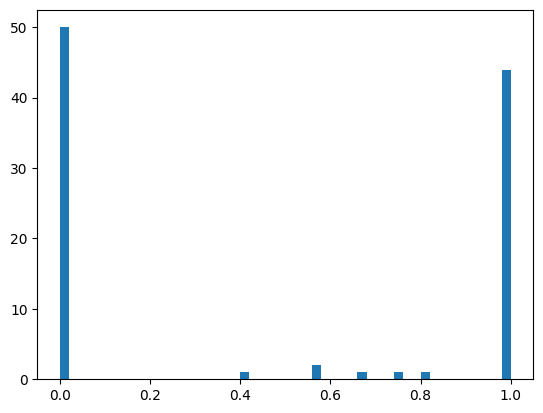

In [30]:
import matplotlib.pyplot as plt
plt.hist(scores,bins=50)

In [31]:
import numpy as np
np.mean(scores)

0.4780667645403358

In [32]:
np.random.seed(1)

In [33]:
def print_random_translation():
  i = np.random.choice(len(eng_phrases_subset))
  eng = eng_phrases_subset[i]
  print("EN:",eng)

  translation = translations[i]['translation_text']
  print("ES translation :",translation)

  matches = eng2spa[eng]
  print("Matches:",matches)

In [34]:
print_random_translation()

EN: Tom isn't that young.
ES translation : Tom no es tan joven.
Matches: ['Tom no es tan joven.']


In [35]:
print_random_translation()

EN: Tom is proud of Mary.
ES translation : Tom está orgulloso de María.
Matches: ['Tom está orgulloso de Mary.']


In [36]:
print_random_translation()

EN: Tom must be Canadian.
ES translation : Tom debe ser canadiense.
Matches: ['Tom tiene que ser canadiense.']
